In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.ndimage as ndimage
import scipy.ndimage as nd
import scipy.interpolate as interpolate
import seaborn as sns
from matplotlib import rcParams
import math
import pandas as pd
from scipy import stats
%matplotlib inline

In [2]:
rcParams['font.sans-serif'] = ['Arial'] 
rcParams['font.size'] = 6
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

rcParams['axes.linewidth'] = 0.5
rcParams['lines.linewidth'] = 0.5
rcParams['lines.markersize'] = 2.5
rcParams['lines.markeredgewidth'] = 0.0

rcParams['xtick.major.width'] = 0.5
rcParams['ytick.major.width'] = 0.5

to_inch = 0.393701
fwidth_cm = 10 
fheight_cm = 10. # cm
spwidth_cm = 1.5
spheight_cm = 3.
w = spwidth_cm/fwidth_cm
h = spheight_cm/fheight_cm
fwidth_inch = fwidth_cm * to_inch
fheight_inch = fheight_cm * to_inch

cmap = plt.cm.magma

lw_scatter = 0.4
ticks_fontsize = 6. 
spines_thickness = 0.5
ticks_width = spines_thickness
s_scatter = 8  
lw_hlines = 1.0
lw_stats_bar = 0.6
lw_scatter = 0.2
alpha_scatter = 0.6
width_bars = 1.5
tick_length = 3.
markersize_rasterdots = 1.5 #
fs = 6. #7
lw = 0.3

color_mpw = np.array([242,101,34])/255
color_su = [0.3,0.3,0.3]
color_EXC = 'dimgray'
color_INH = np.array([62,185,236.])/255 #
    
despine_offset = 2

In [3]:
data_dir = '/.../Data/' 

In [4]:
SimilarityIndex = np.load(data_dir + 'SimilarityIndex.npy', encoding='latin1', allow_pickle=True).item()
SimilarityIndex_EXC = SimilarityIndex['EXC'] 
SimilarityIndex_INH = SimilarityIndex['INH'] 
mask_EXC = SimilarityIndex['mask_SLSD_EXC']  
mask_INH = SimilarityIndex['mask_SLSD_INH'] 
SimilarityIndex_all = SimilarityIndex['all'] 
Fig2_Data = np.load(data_dir + 'Fig2_Data.npy', encoding='latin1', allow_pickle=True).item()
Efficacy = Fig2_Data['Efficacy'] 
efficacy_all = Efficacy['all']
Efficacy_EXC = efficacy_all[mask_EXC] 
Efficacy_INH = efficacy_all[mask_INH] 
#%% 3 C) 
lim_eff_cont = [0.1, 100]  
lim_Similarity = [-0.1, 1] 
x_ticks = [0., 0.5, 1.]
y_ticks = [0.1, 1, 10, 100]

tick_width = 0.5

w = 0.15  
h = 0.15 

ms = 2  

## Plot panel 3 C

Text(0.05, 0.35, 'selected_mask for cluster filter SL SD responses')

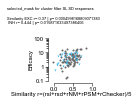

In [5]:
fig = plt.figure()
plt.clf()
fig.set_size_inches(fwidth_inch, fheight_inch)
# Efficacy Similarity
ax_3C = plt.axes([0.2, 0.1, w, h])
ax_3C.tick_params(labelsize=fs)  #
ax_3C.tick_params(length=tick_length)
ax_3C.tick_params(labelsize=ticks_fontsize)
plt.plot(SimilarityIndex_EXC, Efficacy_EXC, 'o', color=color_EXC, label='EXC', markersize=ms)
plt.plot(SimilarityIndex_INH, Efficacy_INH, 'v', color=color_INH, label='INH', markersize=ms)   
ax_3C.set_xlabel('Similarity r=(rsl+rsd+rNM+rPSM+rChecker)/5', labelpad=0, fontsize=fs)
ax_3C.set_ylabel('Efficacy', labelpad=0, fontsize=fs)
plt.xlim(lim_Similarity)
plt.ylim(lim_eff_cont)
ax_3C.set_yscale('log')
ax_3C.set_xticks(x_ticks)
ax_3C.set_xticklabels(x_ticks)
ax_3C.set_yticks(y_ticks)
ax_3C.set_yticklabels(y_ticks)
sns.despine(ax=ax_3C, offset=2, trim=True)

slope_EXC, intercept_EXC, r_value_EXC, p_value_EXC, std_err_EXC = stats.linregress(SimilarityIndex_EXC, np.log(Efficacy_EXC))
slope_INH, intercept_INH, r_value_INH, p_value_INH, std_err_INH = stats.linregress(SimilarityIndex_INH, np.log(Efficacy_INH))
plt.tick_params('both', pad=1) 
plt.figtext(0.05, 0.3, 'Similarity EXC r= %s | p= %s \n INH r= %s | p= %s '%(r_value_EXC.round(3), p_value_EXC, r_value_INH.round(3), p_value_INH ), fontsize=4)
plt.figtext(0.05, 0.35, 'selected_mask for cluster filter SL SD responses', fontsize=4)

## Plot panel 3 B

85 / 85 EXC Pairs | 29 / 29 INH pairs above Thr 
p value E vs I: 0.118


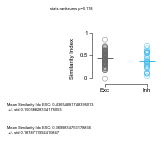

In [6]:
# 3 B)  Similarity 
print('%s / %s EXC Pairs | %s / %s INH pairs above Thr '%(mask_EXC.sum(),len(Efficacy_EXC),  mask_INH.sum(), len(Efficacy_INH) ))
Similarity_EXC = SimilarityIndex_EXC
Similarity_INH = SimilarityIndex_INH

stas, p_Similarity_EI = stats.ranksums(Similarity_EXC, Similarity_INH )
print(f'p value E vs I: {p_Similarity_EI:.3f}')

lw_scatter = 0.4
spines_thickness = 0.5
ticks_width = spines_thickness
ticks_fontsize = 6. 

s_scatter = 8
lw_hlines = 1.0
lw_stats_bar = 0.6
ylim_percentage = 80.
s_scatter = 25
despine_offset = 2

aa = np.ones(len(Similarity_EXC))*1 
bb = np.ones(len(Similarity_INH))*3

ax_3B = plt.axes([0.7,0.6, 0.15, 0.17])
ax_3B.tick_params(length=tick_length)
ax_3B.tick_params(labelsize=ticks_fontsize)  
ax_3B.tick_params(width=ticks_width) 
ax_3B.spines['left'].set_linewidth(spines_thickness)  
ax_3B.spines['right'].set_visible(False)
ax_3B.spines['top'].set_visible(False)
plt.scatter(aa, np.array(Similarity_EXC),  s=s_scatter, facecolors='none', edgecolors=color_EXC, linewidths=lw_scatter) #
plt.scatter(bb, np.array(Similarity_INH),  s=s_scatter, facecolors='none', edgecolors=color_INH, linewidths=lw_scatter) 
positions_x = [1, 3]
ax_3B.hlines(y=np.mean(Similarity_EXC), xmin=0.6, xmax=1.4, linewidth=lw_hlines, color=color_EXC)
ax_3B.hlines(y=np.mean(Similarity_INH), xmin=2.6, xmax=3.4, linewidth=lw_hlines, color=color_INH)
ax_3B.set_ylabel('Similarity Index ', fontsize=fs)
ax_3B.set_ylim([-0.1,1])  
plt.yticks([0, 0.5, 1], ['0',  '0.5', '1'] )  
     
sns.despine(ax = ax_3B, offset=despine_offset , trim=True)  
plt.xticks([1,3],['Exc','Inh'])

plt.figtext(0.6, 0.85, 'stats.ranksums p={:.3f}'.format(p_Similarity_EI) , fontsize=4)
plt.figtext(0.5, 0.5, 'Mean Similarity Idx EXC: %s \n +/- std %s'%(Similarity_EXC.mean(), Similarity_EXC.std() ), fontsize=4)
plt.figtext(0.5, 0.42, 'Mean Similarity Idx EXC: %s \n +/- std %s'%(Similarity_INH.mean(), Similarity_INH.std()), fontsize=4)

plt.tick_params('both',pad=1) 

In [7]:
quartiles = [0.25,0.5,0.75]
Q1_EXC, median_EXC, Q3_EXC = np.quantile(Similarity_EXC, quartiles)
Q1_EXC = np.round(Q1_EXC,2)
Q3_EXC = np.round(Q3_EXC,2)
median_EXC = np.round(median_EXC,2)

quartiles = [0.25,0.5,0.75]
Q1_INH, median_INH, Q3_INH = np.quantile(Similarity_INH, quartiles)
Q1_INH = np.round(Q1_INH,2)
Q3_INH = np.round(Q3_INH,2)
median_INH = np.round(median_INH,2)

In [8]:
# Create data frames
inh = len(Similarity_INH)*['INH']
exc = len(Similarity_EXC)*['EXC']
cell_types = inh + exc

Similarity_all = list(Similarity_INH) + list(Similarity_EXC)

df_Similarity = pd.DataFrame()
df_Similarity['Similarity']  = Similarity_all
df_Similarity['cell_types']  = cell_types

colors = [ color_INH, color_EXC]

x_labels = [0, 0.5, 1]
x_positions = [0, 0.5, 1]
y_labels = [0, 0.5, 1]
y_positions =  [0, 0.5, 1]

## Plot panel 3 B Cumulative Distribution

Text(0.5, 0.17, 'Median Similarity INHs: 0.36, Q1: 0.24, Q3: 0.56 ')

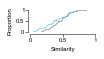

In [9]:
# 5B contribution cum hist
ax_CumHist = plt.axes([0.7,0.3, 0.15, 0.075])
ax_CumHist.tick_params(length=tick_length)
ax_CumHist.spines['right'].set_visible(False)
ax_CumHist.spines['top'].set_visible(False)

sns.ecdfplot(data=df_Similarity, x="Similarity", hue="cell_types", stat = 'proportion' ,  palette=colors, legend=False)

ax_CumHist.set_xticks(x_positions)
ax_CumHist.set_xticklabels(x_labels)
ax_CumHist.set_yticks(y_positions)
ax_CumHist.set_yticklabels(y_labels)

mark = 0.5
ax_CumHist.hlines(y= mark, xmin= median_EXC, xmax=median_INH, linewidth=lw, linestyles='dashed', color='k')
ax_CumHist.set_xlim([0, 1])
sns.despine(ax= ax_CumHist, offset=despine_offset , trim=True)

plt.tick_params('both', pad=1)  

fig.text(0.5, 0.2, 'Median Similarity EXCs: %s, Q1: %s, Q3: %s '%(median_EXC, Q1_EXC, Q3_EXC), fontsize=4)
fig.text(0.5, 0.17, 'Median Similarity INHs: %s, Q1: %s, Q3: %s '%(median_INH, Q1_INH, Q3_INH), fontsize=4)

In [10]:
df_Fig3 = pd.DataFrame()
df_Fig3['SimilarityIndex_all']  = SimilarityIndex_all
df_Fig3['efficacy_all']  = efficacy_all
df_Fig3['mask_EXC_SNRresponse']  = mask_EXC
df_Fig3['mask_EXC_SNRresponse']  = mask_INH
df_Fig3

,SimilarityIndex_all,efficacy_all,mask_EXC_SNRresponse
0,0.063160,1.815268,False
1,0.081397,7.347487,False
2,0.071167,3.088331,False
3,0.405637,4.977648,False
4,0.159690,16.350412,False
...,...,...,...
327,0.134572,32.721791,False
328,0.118865,18.076064,False
329,0.131424,30.115754,False
330,0.113243,5.218658,False


In [11]:
# Write Data as .xlsx
sheet_name = 'fig3'
file_name = data_dir + 'data_source_fig3.xlsx'
with pd.ExcelWriter(file_name) as writer: 
    df_Fig3.to_excel(writer, sheet_name=sheet_name,startcol=0)